In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import json
import re
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from bs4 import BeautifulSoup as bs
import urllib.request 
from urllib.request import urlopen
import seaborn as sb
import os
import time
import requests
from requests import get
import re
from random import randint
from warnings import warn
from time import time
from datetime import datetime
from time import sleep
from selenium import webdriver
import pandas as pd
%matplotlib inline
import matplotlib as plt
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [333]:
from matplotlib import pyplot as plt

In [ ]:
url = 'https://sandiego.craigslist.org/csd/apa/d/san-diego-steps-to-mission-beach/7353789135.html'
html = requests.get(url)
soup = bs(html.text, 'html.parser')
soup
detailsRent = soup.find_all('p', {'class': 'attrgroup'})
detailsRent
bedBathSqft = soup.find_all('span', {'class': 'shared-line-bubble'})


In [ ]:
##test 1

url = 'https://inlandempire.craigslist.org/apa/d/riverside-fith-wheel-for-sale-32-ft/7352437691.html'
html = requests.get(url)
soup = bs(html.text, 'html.parser')

In [ ]:
## test 2
url = 'https://sandiego.craigslist.org/csd/apa/d/san-diego-cottage-apartment/7362820000.html'
html = requests.get(url)
soup = bs(html.text, 'html.parser')


In [ ]:
# test 3

url = 'https://post.craigslist.org/k/PnqhrBD76xGi4hlwdlBDLA/ZZFwS?s=preview'
html = requests.get(url)
soup = bs(html.text, 'html.parser')
soup

In [61]:
import requests
from requests import get
import re
from random import randint
from warnings import warn
from time import time
from datetime import datetime
from time import sleep
from selenium import webdriver
import pandas as pd

url = 'https://sandiego.craigslist.org/search/apa?'
html = requests.get(url)
soup = bs(html.text, 'html.parser')
linksList = []
hoodList = []
find_total = soup.find('div', class_= 'search-legend')
total_posts = 1 #int(find_total.find('span', class_='totalcount').text)
pages = np.arange(0, total_posts+1, 1) ## change to 120 to creat the whole scraping loop
iterations = 0

for page in pages:
    response = get(url 
                   + "s=" # parameter for defining page number in the link 
                   + str(page)) # page number in the pages array
    sleep(randint(10,20)) ## slowing the crawl rate
    if response.status_code != 200: ## setting a warning if we get a bad response
        warn('Request: {}; Status code: {}'.format(requests,response.status_code))
    soup = bs(response.text, 'html.parser') ## Using beautiful soup to parse the html from the get request and converting to text
    c_links = soup.find_all('h3', {'class': 'result-heading'})## finding all the links to the ads
    hood_pull = soup.find_all('span', {'class': 'result-meta'})
    for item in c_links: ## Loop to grab just the links from object they're in and appending to our empty list
        links = item.find('a', {'class':'result-title hdrlnk'})['href']
        linksList.append(links)
        iterations += 1
        print("link " + str(iterations) + " scraped successfully!")
    for item in hood_pull: ## Loop to grab just the links from object they're in and appending to our empty list
        hood = item.find('span', {'class': 'result-hood'}).text
        hood = hood.replace('(','')
        hood = hood.replace(')','')
        hoodList.append(hood)
        iterations += 1
        print("hood " + str(iterations) + " scraped successfully!")

    
print("\n")
print("Scrape complete!")  


def notFound(listComp, masterList):
    if listComp ==[]:
        listComp = "Not Found" ## works....kind of
        masterList.append(listComp)
    else:
        masterList.append(listComp)
sq_ft = []
title = []
washer_dryer = []
parking = []
flooring = []
rental_period = []
ev_charging = []
ac = []
cats_ok = []
dogs_ok = []
furnished = []
washer_dryer = [] ## extra results needed
smoking = []
parking = [] ## extra results needed
wheelchair = []
housing_type = [] ## extra results needed
bed = []
bath = []
price = []
availability_date = []
posting_date = []


for i in range(0,3000):## 0 and three are selecting to scrape 3 ads through our linked list. So need to just change to max number ads to up the data counts
    url = linksList[i]
    driver2 = webdriver.Chrome()
    driver2.get(url)  
    sleep(randint(10,20))
    soup = bs(driver2.page_source, 'html.parser')
    for z in soup.find_all('p', {'class': 'attrgroup'}):
        z = z.get_text()
        z = z.replace('\n',',')
        res = z.split(',')
    housing = [i for i in res if i =='apartment' or i =='condo' or i == 'cottage/cabin' or i=='duplex' or i =='flat' or
           i == 'house' or i== 'in-law' or i=='loft' or i=='townhouse' or i == 'manufactured' or i=='assisted living' or
           i== 'land']
    notFound(housing,housing_type)
    wd = [i for i in res if i =='w/d in unit' or i =='w/d hookups' or i == 'laundry in bldg' or 
          i=='laundry on site' or i =='no laundry on site']
    notFound(wd,washer_dryer)
    park = [i for i in res if i =='carport' or i =='attached garage' or i == 'detached garage' or 
            i=='off-street parking' or i =='street parking' or i == 'valet parking' or i == 'no parking']
    notFound(park,parking)
    period = [i for i in res if i =='rent period: daily' or i =='rent period: weekly' or i == 'rent period: monthly' or 
              i=='rent period: yearly']
    notFound(period,rental_period)
    floor = [i for i in res if i =='flooring: wood' or i =='flooring: carpet' or i == 'flooring: concrete' or 
             i=='flooring: tile' or i =='flooring: earthen' or i == 'flooring: other']
    notFound(floor,flooring)
    ev = [i for i in res if i =='EV charging']
    notFound(ev,ev_charging)
    acu = [i for i in res if i =='air conditioning']
    notFound(acu,ac)
    cats = [i for i in res if i =='cats are OK - purrr']
    notFound(cats,cats_ok)
    dogs = [i for i in res if i =='dogs are OK - wooof']
    notFound(dogs,dogs_ok)
    furn = [i for i in res if i =='furnished']
    notFound(furn,furnished)
    smoke = [i for i in res if i =='no smoking']
    notFound(smoke,smoking)
    wheel = [i for i in res if i =='wheelchair accessible']
    notFound(wheel,wheelchair)
    if soup.find('span', {'class':'price'}) is not None:
        x =soup.find('span', {'class':'price'}).string
        price.append(x)
    else:
        x = np.nan
        price.append(x)
    if soup.findAll('span', {'class':'housing'})== [] or soup.findAll('span', {'class':'shared-line-bubble'})==[]:
        sq = np.nan
        sq_ft.append(sq)
    elif soup.findAll('span', {'class':'shared-line-bubble'}) is not None and len(soup.findAll('span', {'class':'shared-line-bubble'}))==3 or len(soup.findAll('span', {'class':'shared-line-bubble'}))==2:
        sq = soup.findAll('span', {'class':'shared-line-bubble'})[1].text
        sq = re.sub("\D", "", sq)
        sq = sq[:len(sq)-1]
        sq_ft.append(sq)
    elif soup.findAll('span', {'class':'housing'}) is not None and len(soup.find('span', {'class':'housing'}))==3:
        sq = soup.find('span', {'class':'housing'}).text.split()[3][:-3]
        sq_ft.append(sq)
    else:
        sq = np.nan
        sq_ft.append(sq)
    if  soup.find('span', {'id' : 'titletextonly'}) is not None:
        tit = soup.find('span', {'id' : 'titletextonly'}).text
        title.append(tit)
    else: 
        tit = None
        title.append(tit)
    if soup.find('time', {'class' : 'date timeago'}) is not None:
        post = soup.find('time', {'class' : 'date timeago'})['datetime']
        posting_date.append(post)
    else:
        post = None
        posting_date.append(post)
    a = soup.find('span', {'class' : 'housing_movein_now property_date shared-line-bubble'})
    b= soup.find('span',{'class' :'housing_movein_now property_date shared-line-bubble attr_is_today'})
    if a is None and b is None:
        av = "Not Found"
        availability_date.append(av)
    elif a is not None:
        av = [soup.find('span', {'class' : 'housing_movein_now property_date shared-line-bubble'})['data-date']]
        availability_date.append(av)  ## available
    elif b is not None:
        av = [soup.find('span', {'class' : 'housing_movein_now property_date shared-line-bubble attr_is_today'})['data-date']]
        availability_date.append(av)  ## available
    if soup.findAll('span', {'class':'housing'})==[] or soup.findAll('span', {'class': 'shared-line-bubble'})==[]:
        bb = np.nan
        bed.append(bb)
        bath.append(bb)
    elif soup.findAll('span', {'class': 'shared-line-bubble'}) is not None and len(soup.findAll('span', {'class':'shared-line-bubble'}))==3:
        bb = soup.find('span', {'class': 'shared-line-bubble'}).text ##bed & bath
        bb = re.sub("\D", "", bb)
        if len(bb) ==2:
            bed.append(bb[0])
            bath.append(bb[1])
        elif len(bb)==1:
            bed.append(bb[0])
            bath.append(np.nan)
        elif len(bb)==3:
            bed.append(bb[0])
            ba = float(bb[1:3])
            bat = ba/10
            bath.append(bat)
        else:
            bb = np.nan
            bed.append(bb)
            bath.append(bb)
    elif soup.findAll('span', {'class': 'shared-line-bubble'}) is not None and len(soup.findAll('span', {'class':'shared-line-bubble'}))==1:
        bb = soup.find('span', {'class': 'shared-line-bubble'}).text ##bed & bath
        bb = re.sub("\D", "", bb)
        if len(bb) ==2:
            bed.append(bb[0])
            bath.append(bb[1])
        elif len(bb)==1:
            bed.append(bb[0])
            bath.append(np.nan)
        elif len(bb)==3:
            bed.append(bb[0])
            ba = float(bb[1:3])
            bat = ba/10
            bath.append(bat)
        else:
            bb = np.nan
            bed.append(bb)
            bath.append(bb)
    elif soup.findAll('span', {'class': 'shared-line-bubble'}) is not None and len(soup.findAll('span', {'class':'shared-line-bubble'}))==2:
        bb = soup.find('span', {'class': 'shared-line-bubble'}).text ##bed & bath
        bb = re.sub("\D", "", bb)
        if len(bb) ==2:
            bed.append(bb[0])
            bath.append(bb[1])
        elif len(bb)==1:
            bed.append(bb[0])
            bath.append(np.nan)
        elif len(bb)==3:
            bed.append(bb[0])
            ba = float(bb[1:3])
            bat = ba/10
            bath.append(bat)
        else:
            bb = np.nan
            bed.append(bb)
            bath.append(bb)
    elif soup.findAll('span', {'class':'housing'}) is not None and len(soup.find('span', {'class':'housing'}))==3:
        bb = soup.find('span', {'class':'housing'}).text.split()[1][:-2]
        bed.append(bb)
    else:
        bb = np.nan
        bed.append(bb)
        bath.append(bb)
    driver2.close()
    print("Ad " + str(i) + " scraped successfully!")


sdRents = pd.DataFrame({'title' : title,
                        'links' : linksList,
                        'sq_ft': sq_ft,
                        'posting_date' : posting_date,
                        'bed': bed,
                        'bath': bath,
                        'ev_charging': ev_charging,
                         'ac': ac,
                         'cats_ok': cats_ok,
                         'dogs_ok': dogs_ok,
                         'flooring_type': flooring,
                         'furnished': furnished,
                         'washer_dryer': washer_dryer,
                         'smoking' : smoking,
                        'parking' : parking,
                       'wheelchair' : wheelchair,
                       'price' : price,
                        'housing type' : housing_type,
                        'rent period' : rental_period,
                       'availability_date' : availability_date, 
                        'hood' : hoodList})

## Data Cleaning

sdRents['Price_Hundreds'] = sdRents['price'].str.extract('(....)', expand=True)
sdRents['Price_Thousands'] = sdRents['price'].str.extract('(......)', expand=True)
mask = sdRents['Price_Thousands'].isnull()
sdRents['Price_Thousands'][mask] = sdRents['Price_Hundreds']
sdRents['Price'] = sdRents['Price_Thousands'].replace({'\$':''}, regex = True)
sdRents['Price'] = sdRents['Price'].replace({'\,':''}, regex = True)
sdRents.drop(columns=['Price_Thousands', 'Price_Hundreds'],axis=1, inplace=True)

sdRents['Sq_FT_Hundreds'] = sdRents['sq_ft'].str.extract('(\d\d\d)', expand=True)
sdRents['Sq_FT_Thousands'] = sdRents['sq_ft'].str.extract('(\d\d\d\d)', expand=True)
sdRents['Sq_Ft'] = sdRents['Sq_FT_Thousands'].fillna(sdRents['Sq_FT_Hundreds'])
sdRents.drop(columns=['Sq_FT_Hundreds', 'Sq_FT_Thousands'],axis=1, inplace=True)
## Getting correct dtype
## NEED TO DROP NULL VALUES OR FILL THEM
sdRents = sdRents.dropna(axis='rows')

sdRents['Bedrooms'] = sdRents['bed'].astype('int64')
sdRents['Bathrooms'] = sdRents['bath'].astype('int64')
sdRents['Price'] = sdRents['Price'].astype('int64')
sdRents['Sq_Ft'] = sdRents['Sq_Ft'].astype('int64')

sdRents.drop(columns=['bed', 'bath', 'price','sq_ft'], axis =1, inplace = True)

## How to get all the values updated to new categorical values nad account for the brackets

def cleaningFunction(dataFrame, columnName, categoryRating, stringToSearch, elseString, columnName2):
                          dataFrame[columnName] = [categoryRating if x ==[stringToSearch] else elseString for x in dataFrame[columnName2]]

cleaningFunction(sdRents, 'EV Charging', 1, 'EV charging', 0, 'ev_charging')
cleaningFunction(sdRents, 'AC', 1, 'air conditioning', 0, 'ac')
cleaningFunction(sdRents, 'Cats OK', 1, 'cats are OK - purrr', 0, 'cats_ok')
cleaningFunction(sdRents, 'Dogs OK', 1, 'dogs are OK - wooof', 0, 'dogs_ok')
cleaningFunction(sdRents, 'Furnished', 1, 'furnished', 0, 'furnished')
cleaningFunction(sdRents, 'Smoking', 1, 'no smoking', 0, 'smoking')
cleaningFunction(sdRents, 'Wheelchair', 1, 'wheelchair accessible', 0, 'wheelchair')

sdRents.drop(columns=['ev_charging', 'ac', 'cats_ok','dogs_ok', 'furnished', 'smoking', 'wheelchair'], axis =1, inplace = True)

## Housing category
sdRents['apartment'] = [1 if x ==['apartment'] else 0 for x in sdRents['housing type']]

sdRents['condo'] = [1 if x==['condo'] else 0 for x in sdRents['housing type']]

sdRents['cottage/cabin'] = [1 if x==['cottage/cabin'] else 0 for x in sdRents['housing type']]

sdRents['duplex'] = [1 if x==['duplex'] else 0 for x in sdRents['housing type']]

sdRents['flat'] = [1 if x==['flat'] else 0 for x in sdRents['housing type']]

sdRents['house'] = [1 if x==['house'] else 0 for x in sdRents['housing type']]

sdRents['in-law'] = [1 if x==['in-law'] else 0 for x in sdRents['housing type']]

sdRents['loft'] = [1 if x==['loft'] else 0 for x in sdRents['housing type']]

sdRents['townhouse'] = [1 if x==['townhouse'] else 0 for x in sdRents['housing type']]

sdRents['manufactured'] = [1 if x==['manufactured'] else 0 for x in sdRents['housing type']]

sdRents['assisted living'] = [1 if x==['assisted living'] else 0 for x in sdRents['housing type']]

sdRents['land'] = [1 if x==['land'] else 0 for x in sdRents['housing type']]

# ## washer dryer category
sdRents['w/d in unit'] = [1 if x ==['w/d in unit'] else 0 for x in sdRents['washer_dryer']]

sdRents['w/d hookups'] = [1 if x ==['w/d hookups'] else 0 for x in sdRents['washer_dryer']]

sdRents['laundry in bldg'] = [1 if x ==['laundry in bldg'] else 0 for x in sdRents['washer_dryer']]

sdRents['laundry on site'] = [1 if x ==['laundry on site'] else 0 for x in sdRents['washer_dryer']]

sdRents['no laundry on site'] = [1 if x ==['no laundry on site'] else 0 for x in sdRents['washer_dryer']]

## parking category

sdRents['carport'] = [1 if x ==['carport'] else 0 for x in sdRents['parking']]

sdRents['attached garage'] = [1 if x ==['attached garage'] else 0 for x in sdRents['parking']]

sdRents['detached garage'] = [1 if x ==['detached garage'] else 0 for x in sdRents['parking']]

sdRents['off-street parking'] = [1 if x ==['off-street parking'] else 0 for x in sdRents['parking']]

sdRents['street parking'] = [1 if x ==['street parking'] else 0 for x in sdRents['parking']]

sdRents['valet parking'] = [1 if x ==['valet parking'] else 0 for x in sdRents['parking']]

sdRents['no parking'] = [1 if x ==['no parking'] else 0 for x in sdRents['parking']]

# ## Flooring type
sdRents['wood_floors'] = [1 if x ==['flooring: wood'] else 0 for x in sdRents['flooring_type']]

sdRents['carpet_floors'] = [1 if x ==['flooring: carpet'] else 0 for x in sdRents['flooring_type']]

sdRents['concrete_floors'] = [1 if x ==['flooring: concrete'] else 0 for x in sdRents['flooring_type']]

sdRents['tile_floors'] = [1 if x ==['flooring: tile'] else 0 for x in sdRents['flooring_type']]

sdRents['earthen_floors'] = [1 if x ==['flooring: earthen'] else 0 for x in sdRents['flooring_type']]

sdRents['other_floors'] = [1 if x ==['flooring: other'] else 0 for x in sdRents['flooring_type']]


# ## Rental Period
                       
sdRents['daily_rent'] = [1 if x ==['rent period: daily'] else 0 for x in sdRents['rent period']]

sdRents['weekly_rent'] = [1 if x ==['rent period: weekly'] else 0 for x in sdRents['rent period']]

sdRents['monthly_rent'] = [1 if x ==['rent period: monthly'] else 0 for x in sdRents['rent period']]

sdRents['yearly_rent'] = [1 if x ==['rent period: yearly'] else 0 for x in sdRents['rent period']]

sdRents.drop(columns=['rent period', 'flooring_type', 'parking','washer_dryer', 'housing type'], axis =1, inplace = True)

# sdRents.to_csv('sdRents.csv')
pd.set_option("display.max_rows", None) 
sdRents.describe()
sdRents.head(25)

sdRents.describe()

link 1 scraped successfully!
link 2 scraped successfully!
link 3 scraped successfully!
link 4 scraped successfully!
link 5 scraped successfully!
link 6 scraped successfully!
link 7 scraped successfully!
link 8 scraped successfully!
link 9 scraped successfully!
link 10 scraped successfully!
link 11 scraped successfully!
link 12 scraped successfully!
link 13 scraped successfully!
link 14 scraped successfully!
link 15 scraped successfully!
link 16 scraped successfully!
link 17 scraped successfully!
link 18 scraped successfully!
link 19 scraped successfully!
link 20 scraped successfully!
link 21 scraped successfully!
link 22 scraped successfully!
link 23 scraped successfully!
link 24 scraped successfully!
link 25 scraped successfully!
link 26 scraped successfully!
link 27 scraped successfully!
link 28 scraped successfully!
link 29 scraped successfully!
link 30 scraped successfully!
link 31 scraped successfully!
link 32 scraped successfully!
link 33 scraped successfully!
link 34 scraped suc

KeyboardInterrupt: 

In [ ]:
pd.set_option("display.max_columns", None) 
sdRents.describe()

In [ ]:
sdRents.to_csv('sdRents.csv')

In [ ]:
import seaborn as sns
print(sdRents['Price'].skew())
sns.distplot(sdRents['Price'], kde=True)

In [ ]:
sns.lmplot(x ="Bathrooms", y ="Price", data = sdRents, order = 2, ci = None)

In [ ]:
X = sdRents[['apartment', 
            'condo', 'house','townhouse','Bedrooms','Bathrooms', 'daily_rent','weekly_rent','monthly_rent','yearly_rent',
            'carport','attached garage','detached garage',
            'street parking','no parking', 'AC','w/d hookups','laundry in bldg','no laundry on site',
            'w/d in unit','Cats OK','Smoking','wood_floors','carpet_floors','concrete_floors','tile_floors']]
Y = sdRents["Price"]
x = sm.add_constant(sdRents)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

In [ ]:
X = sdRents[["Sq_Ft",'Bedrooms','Bathrooms', 'AC', 'carport','condo','w/d in unit', 'Cats OK', 'EV Charging', 
            'Furnished', 'Smoking', 'Wheelchair', 'apartment', 
            'condo', 'cottage/cabin', 'duplex', 'flat','house','in-law', 'townhouse','manufactured','assisted living','land',
            'w/d hookups','laundry in bldg','no laundry on site','carport','attached garage','detached garage','off-street parking',
            'street parking', 'valet parking','no parking', 'wood_floors','carpet_floors','concrete_floors','tile_floors','earthen_floors',
             'other_floors', 'daily_rent','weekly_rent','monthly_rent','yearly_rent']]
Y = sdRents["Price"]
x = sm.add_constant(sdRents)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

In [360]:
X = sdRents[['Bathrooms']]
Y = sdRents["Price"]
x = sm.add_constant(sdRents)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                 1.868e+04
Date:                Mon, 06 Sep 2021   Prob (F-statistic):               0.00
Time:                        12:21:33   Log-Likelihood:                -18500.
No. Observations:                2251   AIC:                         3.700e+04
Df Residuals:                    2250   BIC:                         3.701e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Bathrooms   1699.4358     12.436    136.660      0.000    1675.050    1723.822
==============================================================================
Omnibus:                      125.919   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              501.733
Skew:                          -0.004   Prob(JB):                    1.12e-109
Kurtosis:                       5.313   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

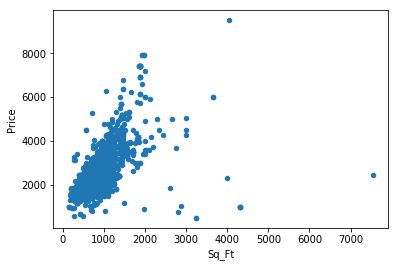

In [14]:
sdRents = pd.read_csv('sdRents.csv') 
sdRents.plot(kind = 'scatter', x = 'Sq_Ft', y = 'Price')

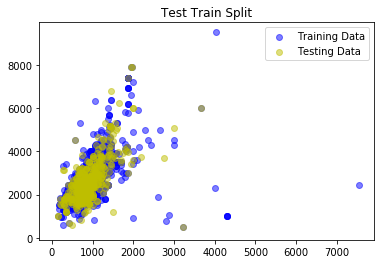

In [19]:
import matplotlib.pyplot as plt

## Test Train splitr for supervised learning
## X is our IV and y is DV in this case broken into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(sdRents.Sq_Ft, sdRents.Price)

# Test Train viz

plt.scatter(x_train, y_train, label='Training Data', color = 'b', alpha =.5)
plt.scatter(x_test, y_test, label='Testing Data', color = 'y', alpha =.5)
plt.legend()
plt.title('Test Train Split')
plt.show()

In [21]:
# Create linear model
model = LinearRegression()
#Fitting to the training data, so best fit line on training data set
model.fit(x_train.values.reshape(-1,1), y_train.values) ## reshape function included to meet requirements to be 
#2D for Linear Regression
print('The intercept', model.intercept_)
print('coefficient for the x value', model.coef_)

The intercept 1530.4149249107288
coefficient for the x value [1.13395633]


[2097.39308753 2671.1749881  2451.187461   2724.47093538 2454.58932998
 2664.37125015 2015.74823211 2677.97872605 2437.5799851  1693.70463574
 2437.5799851  2952.39615676 2309.44292035 2437.5799851  2346.86347908
 2891.16251519 2809.51765978 2324.18435258 2835.59865526 2403.56129534
 5193.09385542 2726.73884803 2379.74821251 2439.84789775 2550.97561762
 3175.78555283 2238.00367186 2640.55816732 2852.60800014 2550.97561762
 1870.60182248 2369.54260559 2228.93202126 2097.39308753 2485.20615076
 1866.06599718 2761.89149412 2605.40552123 2486.34010708 2634.88838569
 1927.29963874 2309.44292035 2287.89775017 2380.88216884 2809.51765978
 2947.86033146 2456.85724263 2437.5799851  2497.67967034 2888.89460254
 2329.8541342  2329.8541342  2550.97561762 2756.22171249 4025.11884043
 2486.34010708 2451.187461   2634.88838569 2437.5799851  2353.66721703
 2403.56129534 2385.41799414 2292.43357547 3189.39302873 2764.15940677
 1842.25291435 2403.56129534 2284.49588119 2437.5799851  2403.56129534
 5673.

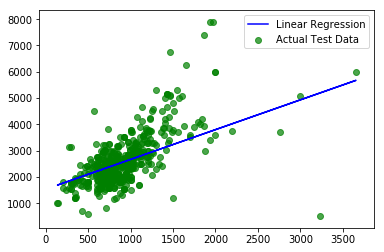

In [22]:
# Use the model we created( our two variable for x & y) on our Testing data to  see how our prediction does in predicting

y_Predictions = model.predict(x_test.values.reshape(-1,1)) ## Sq_ft's impact on price based off our testing data, Y prediction
plt.plot(x_test, y_Predictions, label = 'Linear Regression', color = 'b') ## compare x test and predictions from model (Regression Line)
plt.scatter(x_test,y_test,label = 'Actual Test Data', color = 'g', alpha=.7) ## plot actual data testing against to see how well the line fits
plt.legend()
plt.show
print(y_Predictions)

In [23]:
# How model predicts a specific measurement, in this case the proce based off 938 sq ft

model.predict(np.array([[928]]))[0]

2582.726394729959

In [24]:
## Comparing

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_Predictions})
df

,Actual,Predicted
2126,570,2097.393088
365,2701,2671.174988
434,1936,2451.187461
1669,3017,2724.470935
257,2233,2454.589330
815,2495,2664.371250
1745,690,2015.748232
193,2670,2677.978726
1361,1650,2437.579985
92,1000,1693.704636


In [25]:
#score the model, how accurate it is
print("Model Score is", model.score(x_test.values.reshape(-1,1), y_test.values)
)


Model Score is 0.3840425815904933


In [57]:
X = sdRents[["Sq_Ft",'Bedrooms','Bathrooms', 'AC', 'carport','condo','w/d in unit', 'Cats OK', 'EV Charging', 'Furnished', 'Smoking', 'Wheelchair', 'apartment', 
            'condo', 'cottage/cabin', 'duplex', 'flat','house','in-law', 'townhouse',
            'manufactured','assisted living','land',
            'w/d hookups','laundry in bldg','no laundry on site','carport','attached garage','detached garage',
            'off-street parking',
            'street parking', 'valet parking','no parking', 'wood_floors','carpet_floors','concrete_floors','tile_floors',
            'earthen_floors',
            'other_floors', 'daily_rent','weekly_rent','monthly_rent','yearly_rent']]
Y = sdRents["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print('The intercept', model.intercept_)
print('coefficient for the x value', model.coef_)
coeff_df

The intercept 758.8762336694829
coefficient for the x value [ 3.13823116e-01  2.13461070e+02  4.15245333e+02 -2.34958891e+02
 -9.15049409e+01  2.00608484e+02  7.56189440e+02  9.29558089e+01
  1.80959495e+02 -6.30033222e+01  1.98400072e+02  3.23766143e+02
  1.03022823e+02  2.00608484e+02  1.99115663e+02  1.40248928e+02
 -3.19881378e+02  1.10636433e+02 -3.78944944e+02  1.42972824e+02
 -1.97778834e+02  0.00000000e+00 -1.13686838e-13  1.67655653e+02
  1.01384725e+02  1.49127492e+02 -9.15049409e+01 -1.64734898e+02
  1.81164052e+01 -6.89647786e+01 -1.35073499e+01 -5.68434189e-14
  3.20595563e+02 -4.03209072e+01 -2.97320100e+02 -1.77902100e+02
 -1.08225695e+02  0.00000000e+00  1.01197659e+02 -1.88051117e+02
 -1.09182513e+03  6.86059131e+01  1.19864872e+02]


,Coefficient
Sq_Ft,3.138231e-01
Bedrooms,2.134611e+02
Bathrooms,4.152453e+02
AC,-2.349589e+02
carport,-9.150494e+01
condo,2.006085e+02
w/d in unit,7.561894e+02
Cats OK,9.295581e+01
EV Charging,1.809595e+02
Furnished,-6.300332e+01


In [58]:
y_pred = model.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
1056,2580,1609.136640
443,2400,2651.321605
1180,2299,2139.255552
838,2280,2139.255552
1203,2299,2457.937613
2170,2960,2294.832074
1376,4500,3900.689516
1498,2500,2530.463469
711,2425,2138.537891
1319,1595,2367.741611


In [48]:
len(y_test)

451

In [59]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 426.50391412023913
Mean Squared Error: 435123.3955652825
Root Mean Squared Error: 659.6388372172173


In [ ]:
sns.lmplot(x ="Sq_Ft", y ="Price", data = sdRents, order = 2, ci = None)

In [ ]:
from sklearn import datasets
x = np.c_[sdRents['Bathrooms']]
y = np.c_[sdRents['Price']]

In [ ]:
x = np.array(x)

In [ ]:
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# train_set, test_set = train_test_split(sdRents, test_size=0.2, random_state= 42)
model = LinearRegression()
# model.fit(X_train, y_train)

model.fit(x,y)
model.score(x, y)
model.coef_
model.predict(x)
